# 小プロジェクト ＋ レポート作成

熊本市オープンデータの[校区別人口（5歳刻み）](https://www.city.kumamoto.jp/opendata/pub/detail.aspx?c_id=38&id=1)を使って、データ分析し、なにか考察しましょう。

必須項目

- なぜこの分析をしたのか
  - 着想に至った経緯
- 結論
  - 分析の結果得られた結論
- すごいところ
  - 自分の頑張ったところ
- 実際のコード
  - 少なくともpandasとmatplotlibは使って、画像が１枚以上ある
  - Colabで動かした結果

**注意**

このレポートはgithubで公開するので、以下の点に注意してください。

- レポート中に学籍番号などの個人情報は載せない
- ネットからコピペしない

## レポートのサンプル

- なぜこの分析をしたのか
  - 昨今、少子化が叫ばれているので、熊本市だとどこが赤ちゃんの人数が多いか気になったため
- 結論
  - どうやら郊外が多そう。住宅地が多いから？
- すごいところ
  - foliumやgeocoderという授業で習ってないライブラリを調査し調べた



In [ ]:
# 必要なファイルのインストールと読み込み

!pip install japanize-matplotlib
!pip install geocoder
!pip install folium
!wget https://www.city.kumamoto.jp/opendata/pub/02koukubetsujinkou_5y.csv

In [ ]:
# ライブラリのインポート
import pandas as pd
import geocoder
import folium
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [ ]:
# データの確認
df = pd.read_csv('02koukubetsujinkou_5y.csv', encoding="shift-jis", header=1)
df.head(10)

,年,月,区,校区,性別,0〜4歳,5〜9歳,10〜14歳,15〜19歳,20〜24歳,25〜29歳,30〜34歳,35〜39歳,40〜44歳,45〜49歳,50〜54歳,55〜59歳,60〜64歳,65〜69歳,70〜74歳,75〜79歳,80〜84歳,85〜89歳,90〜94歳,95〜99歳,100歳以上
0,2020,1,中央区,城東,男,54,76,45,44,52,79,78,103,116,124,100,91,79,104,84,61,45,28,16,7,0.0
1,2020,1,中央区,城東,女,50,60,64,47,80,109,95,95,136,142,126,107,101,106,118,95,82,92,45,13,1.0
2,2020,1,中央区,慶徳,男,61,60,56,48,128,176,136,141,127,145,137,119,86,79,69,48,32,26,6,0,0.0
3,2020,1,中央区,慶徳,女,72,49,52,73,166,192,156,142,155,171,131,137,117,114,102,90,59,45,18,6,2.0
4,2020,1,中央区,五福,男,86,66,61,84,108,105,96,125,130,154,123,115,101,88,92,76,47,22,9,3,1.0
5,2020,1,中央区,五福,女,71,84,76,73,102,144,128,141,158,187,162,140,115,127,148,107,79,59,31,8,0.0
6,2020,1,中央区,一新,男,209,173,170,199,249,290,267,296,321,373,277,314,293,262,270,187,108,89,33,7,0.0
7,2020,1,中央区,一新,女,198,182,201,249,348,406,326,346,388,382,360,369,292,343,319,305,224,166,120,29,5.0
8,2020,1,中央区,壺川,男,178,211,242,187,190,188,224,286,310,322,303,291,251,295,246,174,124,89,34,3,1.0
9,2020,1,中央区,壺川,女,168,201,223,195,220,197,222,281,329,370,334,289,289,313,322,247,229,203,116,34,7.0


In [ ]:
# 1月の0-4歳児の数

df[df['月'] == 1]['0〜4歳'].sum()

33029

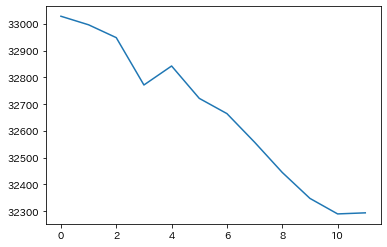

In [ ]:
# 1-12月の0-4歳児の数
plt.plot([df[df['月'] == i]['0〜4歳'].sum() for i in range(1, 13)])

In [ ]:
# 校区の種類
area = df['校区'].unique()
# 校区の緯度経度(大体)
location = {a: geocoder.osm(f"熊本市{a}").latlng for a in area}

In [ ]:
# 校区別の0〜4歳児の数(1月)
population = {a: df[(df['校区'] == a) & (df['月'] == 1)]['0〜4歳'].sum() for a in area}

In [ ]:
lat, lng = geocoder.osm("熊本市").latlng

In [ ]:
kumap = folium.Map(location=[lat, lng], zoom_start=12, tiles='OpenStreetMap')

for k, v in location.items():
  if v is None:
    continue
  size = int(population[k])
  folium.Circle(v, radius=size, popup=k).add_to(kumap)

kumap